## Linear regression

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
advertising_data = pd.read_csv("../datasets/Advertising.csv", index_col=False)

In [8]:
advertising_data = advertising_data[["TV", "Radio", "Newspaper", "Sales"]]

Assessing the linearity between the variables and the label Sales

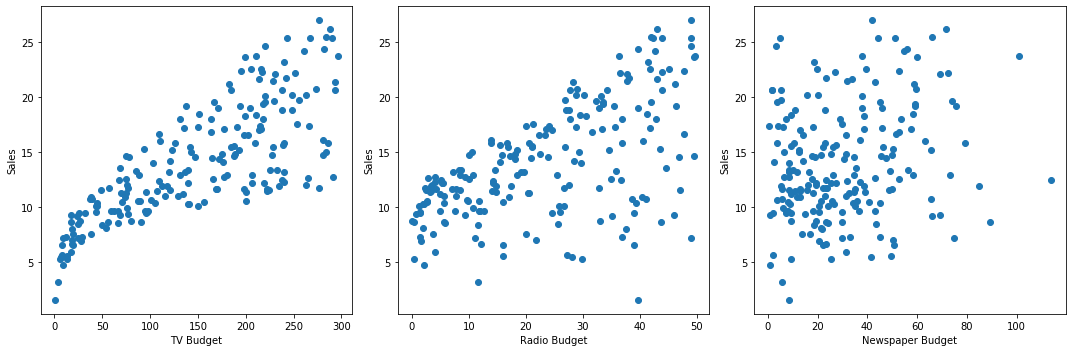

In [9]:
f, axs = plt.subplots(1,3,figsize=(15,5))

plt.subplot(1,3,1)
plt.scatter(advertising_data["TV"], advertising_data["Sales"])
plt.xlabel("TV Budget")
plt.ylabel("Sales")

plt.subplot(1,3,2)
plt.scatter(advertising_data["Radio"], advertising_data["Sales"])
plt.xlabel("Radio Budget")
plt.ylabel("Sales")

plt.subplot(1,3,3)
plt.scatter(advertising_data["Newspaper"], advertising_data["Sales"])
plt.xlabel("Newspaper Budget")
plt.ylabel("Sales")

plt.tight_layout()
plt.show()

No clear linearity but TV Budget and Radio Budget show some positive correlation

#### Least-squares approach

In [15]:
def fit(X, Y):
    """
    Takes two Pandas series as arguments, the first is the feature X
    And the second is the label Y. The function then returns Beta1 and Beta0
    for a linear regression model calculated by the least-squares approach
    """
    
    x = np.array(X)
    y = np.array(Y)
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    
    beta1 = np.sum((x-x_mean)*(y-y_mean))/np.sum((x-x_mean)**2)
    beta0 = y_mean - (beta1*x_mean)
    
    return beta1, beta0

In [17]:
beta1, beta0 = fit(advertising_data["TV"], advertising_data["Sales"])

Plotting our model against the data

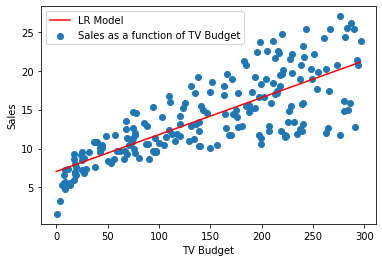

In [35]:
x = np.array(advertising_data["TV"])
series = np.arange(0, np.max(arr), 1)
y = beta0 + (beta1 * series)

plt.scatter(x, advertising_data["Sales"])
plt.plot(series, y, 'r')
plt.xlabel("TV Budget")
plt.ylabel("Sales")
plt.legend(["LR Model", "Sales as a function of TV Budget"])

Assessing the model

In [52]:
true_y = np.array(advertising_data["Sales"])
pred_y = np.array(beta0 + (beta1 * x))
assert len(true_y) == len(pred_y)

RSS

In [57]:
RSS = np.sum((true_y - pred_y)**2)
print("RSS:", RSS)

RSS: 2102.5305831313512


RSE

Roughly speaking this is the average amount that the prediction will deviate from the true regression line definited by $\beta_0, \beta_1$

In [59]:
RSE = np.sqrt((1/(len(true_y)-2)) * RSS)
print("RSE:", RSE)

RSE: 3.2586563686504624


$R^2$

The proportion of variability in Y that can be explained by X

In [62]:
TSS = np.sum((true_y-np.mean(true_y))**2)
r2 = 1 - (RSS/TSS)
print("R2:", r2)

R2: 0.611875050850071
